# 1. Importing Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (
confusion_matrix,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_auc_score,
roc_curve,
classification_report
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# 2. Load Dataset

In [2]:
DATA_PATH = '/content/dataset/diabetes.csv'
df = pd.read_csv(DATA_PATH)

# Assumption: last column is target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


print("Dataset Shape:", df.shape)
print(y.value_counts())

Dataset Shape: (768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64


# 3. Train-Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Load Trained Model (.pkl)

In [6]:
MODEL_PATH = "/content/model/diabetes_predict.pkl"
with open(MODEL_PATH, 'rb') as file:
  model = pickle.load(file)


print("Model loaded successfully")

Model loaded successfully


# 5. Predictions

In [7]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 6. Confusion Matrix

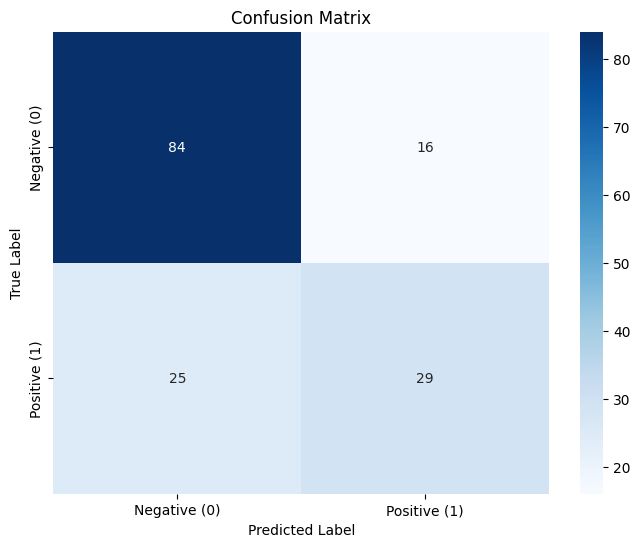

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative (0)', 'Positive (1)'], yticklabels=['Negative (0)', 'Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 7. Evaluation Metrics

In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Specificity

In [10]:
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)

# 8. Final Benchmark Table

In [18]:
benchmark = pd.DataFrame({
"Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "F1-Score", "ROC-AUC", "Specificity"],
"Value": [accuracy, precision, recall, f1, roc_auc, specificity]
})


benchmark["Value"] = benchmark["Value"].round(3)
print("\nFinal Benchmark Results")
benchmark



Final Benchmark Results


,Metric,Value
0,Accuracy,0.734
1,Precision,0.644
2,Recall (Sensitivity),0.537
3,F1-Score,0.586
4,ROC-AUC,0.820
5,Specificity,0.840


# 10. Model Evaluation Plot

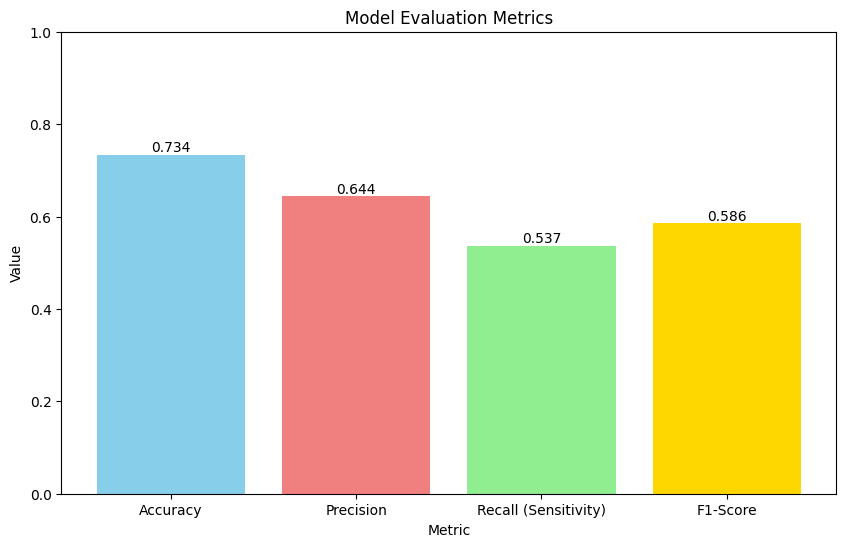

In [20]:
metrics_to_plot = benchmark[benchmark['Metric'].isin(['Accuracy', 'Precision', 'Recall (Sensitivity)', 'F1-Score'])]

plt.figure(figsize=(10, 6))
plt.bar(metrics_to_plot['Metric'], metrics_to_plot['Value'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1) # Metrics are typically between 0 and 1

for index, row in metrics_to_plot.iterrows():
    plt.text(row['Metric'], row['Value'], round(row['Value'], 3), ha='center', va='bottom')

plt.show()

# 9. Classification Report

In [12]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



# 10. ROC Curve

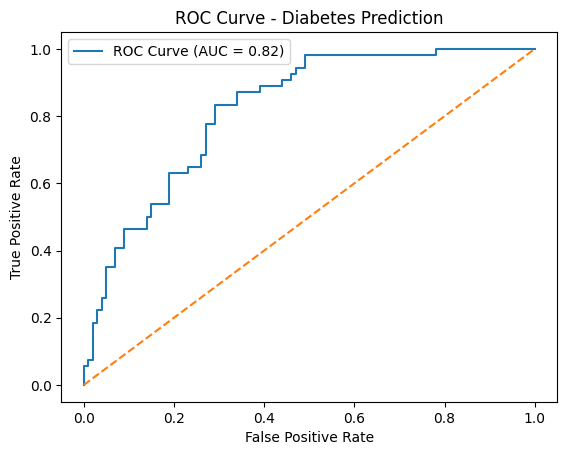

In [13]:
fpr, tpr, _ = roc_curve(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Diabetes Prediction")
plt.legend()
plt.show()